In [ ]:
# 把annovar的结果转为0 1，其中0为deleterious，1为benign
import pandas as pd
import numpy as np

# SIFT
def trans_SIFT(row):
    sift = row["SIFT_pred"]
    if sift == "D":
        return 1
    elif sift == "T":
        return 0
    else:
        return np.NaN

# Polyphen2_HDIV
def trans_Polyphen2_HDIV(row):
    hdiv = row["Polyphen2_HDIV_pred"]
    if hdiv == "P" or hdiv == "D":
        return 1
    elif hdiv == "B":
        return 0
    else:
        return np.NaN

# Polyphen2_HVAR
def trans_Polyphen2_HVAR(row):
    hvar = row["Polyphen2_HVAR_pred"]
    if hvar == "P" or hvar == "D":
        return 1
    elif hvar == "B":
        return 0
    else:
        return np.NaN

# LRT
def trans_LRT(row):
    lrt = row["LRT_pred"]
    if lrt == "D":
        return 1
    elif lrt == "N":
        return 0
    else:
        return np.NaN

# MutationTaster
def trans_MutationTaster(row):
    mt = row["MutationTaster_pred"]
    if mt == "A" or mt == "D":
        return 1
    elif mt == "N" or mt=="P":
        return 0
    else:
        return np.NaN

# MutationAssessor
def trans_MutationAssessor(row):
    ma = row["MutationAssessor_pred"]
    if ma == "H" or ma == "M":
        return 1
    elif ma == "L" or ma == "N":
        return 0
    else:
        return np.NaN

# FATHMM
def trans_FATHMM(row):
    mm = row["FATHMM_pred"]
    if mm == "D":
        return 1
    elif mm == "T":
        return 0
    else:
        return np.NaN

# RadialSVM
def trans_RadialSVM(row):
    ra = row["RadialSVM_pred"]
    if ra == "D":
        return 1
    elif ra == "T":
        return 0
    else:
        return np.NaN

# LR
def trans_LR(row):
    lrt = row["LR_pred"]
    if lrt == "D":
        return 1
    elif lrt == "N":
        return 0
    else:
        return np.NaN

# VEST3
def trans_VEST3(row):
    pass

# CADD
def trans_CADD(row):
    cadd = row["CADD_phred"]
    if np.isnan():
        return np.NaN
    else:
        if cadd > 20:
            return 1
        else:
            return 0

df = pd.read_csv("filter/merged.csv")
df["SIFT_Label"] = df.apply(trans_SIFT, axis=1)
df["Polyphen2_HDIV_Label"] = df.apply(trans_Polyphen2_HDIV, axis=1)
df["Polyphen2_HVAR_Label"] = df.apply(trans_Polyphen2_HVAR, axis=1)
df["LRT_Label"] = df.apply(trans_LRT, axis=1)
df["MutationTaster_Label"] = df.apply(trans_MutationTaster, axis=1)
df["MutationAssessor_Label"] = df.apply(trans_MutationAssessor, axis=1)
df["FATHMM_Label"] = df.apply(trans_FATHMM, axis=1)
df["RadialSVM_Label"] = df.apply(trans_RadialSVM, axis=1)
df.to_csv("filter/merged_with_labels.csv", index=False)

df_swissvar = pd.read_csv("filter/SwissVarSelected.hg19_multianno.csv")
df_swissvar["SIFT_Label"] = df.apply(trans_SIFT, axis=1)
df_swissvar["Polyphen2_HDIV_Label"] = df.apply(trans_Polyphen2_HDIV, axis=1)
df_swissvar["Polyphen2_HVAR_Label"] = df.apply(trans_Polyphen2_HVAR, axis=1)
df_swissvar["LRT_Label"] = df.apply(trans_LRT, axis=1)
df_swissvar["MutationTaster_Label"] = df.apply(trans_MutationTaster, axis=1)
df_swissvar["MutationAssessor_Label"] = df.apply(trans_MutationAssessor, axis=1)
df_swissvar["FATHMM_Label"] = df.apply(trans_FATHMM, axis=1)
df_swissvar["RadialSVM_Label"] = df.apply(trans_RadialSVM, axis=1)
df_swissvar.to_csv("filter/swissvar_with_labels.csv", index=False)

In [2]:
# 合并后的数据集
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("filter/merged_with_labels.csv")
features = ['Chr', 'Start', 'End', 'Ref', 'Alt', 'SIFT_score', 'Polyphen2_HDIV_score', 'Polyphen2_HVAR_score','LRT_score', 'MutationTaster_score', 'MutationAssessor_score',  'FATHMM_score', 'RadialSVM_score', 'VEST3_score', 'CADD_phred', 'A_Ref', 'A_Alt']

labels = ["SIFT_Label", "Polyphen2_HDIV_Label", "Polyphen2_HVAR_Label", "LRT_Label", "MutationTaster_Label", "MutationAssessor_Label", "FATHMM_Label", "RadialSVM_Label", "VEST3_score", "CADD_phred"]
# df = df[features]
 

x_train_all, x_valid, y_train, y_valid = train_test_split(df, df.iloc[:, 0], test_size=0.4, random_state=0)
x_valid_all, x_test_all, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.5, random_state=0)

# only need some features as input of classifier
x_train = x_train_all[features]
x_valid = x_valid_all[features]
x_test = x_valid_all[features]

# remove those Nan from others classifier's results
x_test_nan_removed = x_test_all.dropna(subset=labels)


E:\Envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (8,46,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [154]:
# 调参后，分类器使用最优参数
from lightgbm.sklearn import LGBMClassifier

num_leaves = 48
# num_leaves = 29
n_estimators = 100
max_depth = 8
learning_rate = 0.05
early_stopping_rounds = 5
num_round = 700


print(x_train.shape, x_valid.shape, x_test.shape, y_test.shape, y_valid.shape, y_test.shape)
# optimized_classifier = LGBMClassifier(boosting="gbdt", objective='binary', num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, is_unbalance=True, num_round=num_round, metrics='auc', max_bin=100)
optimized_classifier = LGBMClassifier(boosting="dart", num_leaves=100, max_depth=7, learning_rate=0.05, n_estimators=100, metrics='auc', min_child_samples=30, min_child_weight=0.001, bagging_fraction=0.6, feature_fraction=0.5, reg_alpha=0.08, reg_lambda=0.3, num_round=50)
optimized_classifier.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], categorical_feature=["Chr", "Ref", "Alt", "A_Ref", "A_Alt"], early_stopping_rounds=early_stopping_rounds)
optimized_classifier

(42160, 17) (14054, 17) (14054, 17) (14054,) (14054,) (14054,)
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] num_iterations is set=50, num_round=50 will be ignored. Current value: num_iterations=50
[1]	valid_0's auc: 0.957789
[2]	valid_0's auc: 0.958628
[3]	valid_0's auc: 0.970886
[4]	valid_0's auc: 0.975637
[5]	valid_0's auc: 0.976371
[6]	valid_0's auc: 0.977379
[7]	valid_0's auc: 0.97829
[8]	valid_0's auc: 0.978265
[9]	valid_0's auc: 0.979106
[10]	valid_0's auc: 0.978767E:\Envs\ml\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".f

LGBMClassifier(bagging_fraction=0.6, boosting='dart', feature_fraction=0.5,
               learning_rate=0.05, max_depth=7, metrics='auc',
               min_child_samples=30, num_leaves=100, num_round=50,
               reg_alpha=0.08, reg_lambda=0.3)

In [160]:
swissvar_output = optimized_classifier.predict_proba(swissvar_input)
swissvar_output = swissvar_output[:, 1]
print(me.roc_auc_score(swissvar_label, swissvar_output))

0.7443961268083789


In [47]:
# 预测

y_pred = optimized_classifier.predict(x_test)

In [48]:
# 预测值和其他分类器比较

import numpy as np
# M-CAP,REVEL,MutPred,MVP,MPC,DANN,GERP++

comparators = ['MCAP', 'REVEL', 'MVP_score','DANN_score', 'GERP++_RS']
x_compare = x_test_all.dropna(subset=comparators)

# 对分数做归一化
comparator_to_normalized = ["MCAP", 'GERP++_RS']

max_min_scaler = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))

for c in comparators:
    print(c)
    if c in comparator_to_normalized:
        x_compare[c + "_normalized"] = x_compare[[c]].apply(max_min_scaler)
    else:
        x_compare[c + "_normalized"] = x_compare[c]


MCAP
REVEL
MVP_score
DANN_score
GERP++_RS
E:\Envs\ml\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
E:\Envs\ml\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.9317857430201009
0.9310240831767322
0.944577939929214
0.7160262790067599
0.6453772868184806
0.9674305508481944


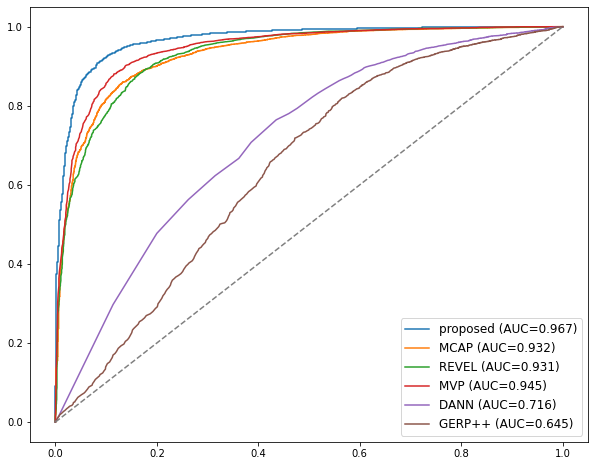

In [78]:
# 在自己的数据集上比较不同分类器性能

x_label = x_compare["True Label"]
# 得到自己的分类器的输出
x_input = x_compare[features]
x_output = optimized_classifier.predict_proba(x_input)
x_output = x_output[:, 1]

print(me.roc_auc_score(x_label, x_compare["MCAP_normalized"]))
print(me.roc_auc_score(x_label, x_compare["REVEL_normalized"]))
print(me.roc_auc_score(x_label, x_compare["MVP_score_normalized"]))
print(me.roc_auc_score(x_label, x_compare["DANN_score_normalized"]))
print(me.roc_auc_score(x_label, x_compare["GERP++_RS_normalized"]))
print(me.roc_auc_score(x_label, x_output))


x_probs = [x_output, x_compare["MCAP_normalized"], x_compare["REVEL_normalized"], x_compare["MVP_score_normalized"], x_compare["DANN_score_normalized"], x_compare["GERP++_RS_normalized"]]
# 画roc曲线
import matplotlib.pyplot as plt

def draw_roc_curve(label, pred_probs, classifiers):
    fpr_tpr_aucs = []
    for pred_prob in pred_probs:
        assert(len(pred_prob)==len(label))
        fpr, tpr, thres= me.roc_curve(label, pred_prob)
        auc = me.auc(fpr, tpr)
        fpr_tpr_aucs.append([fpr, tpr, auc])
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(fpr_tpr_aucs)):
        ax.plot(fpr_tpr_aucs[i][0], fpr_tpr_aucs[i][1], label='{} (AUC={})'.format(classifiers[i], str(round(fpr_tpr_aucs[i][2], 3))))
    #绘制对角线
    ax.plot([0,1],[0,1],linestyle='--',color='grey')
    #调整字体大小
    plt.legend(fontsize=12)
    plt.show()

classifers = ["proposed", "MCAP", "REVEL", "MVP", "DANN", "GERP++"]
draw_roc_curve(x_label, x_probs, classifers)

In [6]:
# 在swissvar上比较不同分类器性能
import pandas as pd

features = ['Chr', 'Start', 'End', 'Ref', 'Alt', 'SIFT_score', 'Polyphen2_HDIV_score', 'Polyphen2_HVAR_score','LRT_score', 'MutationTaster_score', 'MutationAssessor_score',  'FATHMM_score', 'RadialSVM_score', 'VEST3_score', 'CADD_phred', 'A_Ref', 'A_Alt']

labels = ["SIFT_Label", "Polyphen2_HDIV_Label", "Polyphen2_HVAR_Label", "LRT_Label", "MutationTaster_Label", "MutationAssessor_Label", "FATHMM_Label", "RadialSVM_Label", "VEST3_score", "CADD_phred"]

swissvar_test_all = pd.read_csv("filter/swissvar_with_labels.csv")
print(swissvar_test_all.shape)
# swissvar_test_all = swissvar_test_all.dropna(subset=labels)
# swissvar_test_input = swissvar_test_all[features]

comparators = ['MCAP', 'REVEL', 'MVP_score','DANN_score', 'GERP++_RS']
swissvar_compare = swissvar_test_all.dropna(subset=comparators)
swissvar_input = swissvar_compare[features]
# swissvar_output = optimized_classifier.predict_proba(swissvar_input)
# swissvar_output = swissvar_output[:, 1]
swissvar_label = swissvar_compare["True Label"]

# 对分数做归一化
comparator_to_normalized = ["MCAP", 'GERP++_RS']

max_min_scaler = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))

for c in comparators:
    print(c)
    if c in comparator_to_normalized:
        swissvar_compare[c + "_normalized"] = swissvar_compare[[c]].apply(max_min_scaler)
    else:
        swissvar_compare[c + "_normalized"] = swissvar_compare[c]

(12144, 117)
MCAP
REVEL
MVP_score
DANN_score
GERP++_RS
E:\Envs\ml\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
E:\Envs\ml\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.743985023184391
0.7429864189456515
0.7571833717598924
0.7214396985625458
0.6440233717525521
0.6315611881477371


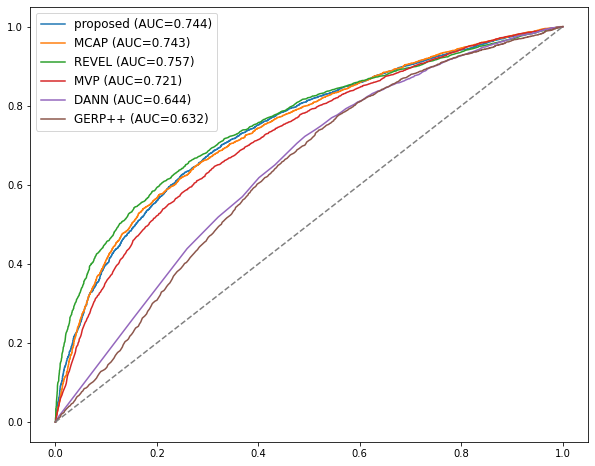

In [132]:
import sklearn.metrics as me
compare_classifiers = ["MCAP_normalized", "REVEL_normalized", "MVP_score_normalized", "DANN_score_normalized", "GERP++_RS_normalized"]
 
print(me.roc_auc_score(swissvar_label, swissvar_output))
print(me.roc_auc_score(swissvar_label, swissvar_compare["MCAP_normalized"]))
print(me.roc_auc_score(swissvar_label, swissvar_compare["REVEL_normalized"]))
print(me.roc_auc_score(swissvar_label, swissvar_compare["MVP_score_normalized"]))
print(me.roc_auc_score(swissvar_label, swissvar_compare["DANN_score_normalized"]))
print(me.roc_auc_score(swissvar_label, swissvar_compare["GERP++_RS_normalized"]))

swissvar_probs = [swissvar_output, swissvar_compare["MCAP_normalized"], swissvar_compare["REVEL_normalized"], swissvar_compare["MVP_score_normalized"], swissvar_compare["DANN_score_normalized"], swissvar_compare["GERP++_RS_normalized"]]

draw_roc_curve(swissvar_label, swissvar_probs, classifers)

In [ ]:
# 在测试集上验证效果

import sklearn.metrics as me


# 对测试集进行测试

y_pred_prob = optimized_classifier.predict_proba(x_test)
y_pred_prob_0 = y_pred_prob[:,1]
print("------report-----")
print(me.classification_report(y_test, y_pred))
print("------roc_auc_score------")
print(me.roc_auc_score(y_test, y_pred_prob_0))
# thresholds = []
# start = 0
# for i in range(10):
#         thresholds.append(round(start + i * 0.1, 2))
# for threshold in thresholds:
#     print("-----threshold {}-----".format(threshold))
#     y_pred = y_pred = [0 if _ < threshold else 1 for _ in y_pred_prob_0]
#     print(me.accuracy_score(y_test, y_pred))
print("-----accuracy-----")
print(me.accuracy_score(y_test, y_pred))

# 补充测试集
extra_y_pred = optimized_classifier.predict(extra_df.iloc[:,1:])
extra_y = extra_df.iloc[:, 0]
print("------acccuracy------")
print(me.accuracy_score(extra_y, extra_y_pred))
